# Task 1

Objective: Apply statistical hypothesis testing to evaluate the impact of different website themes on user engagement.

### Formulate Hypotheses:

In [12]:
# Import libraries
import pandas as pd
from scipy.stats import ttest_ind

# Load dataset (relative path)
df = pd.read_csv("data/website_ab_test.csv")

# Display basic info
print(df.info())
print(df.head())

# H₀: μ₁ = μ₂ (mean conversion rates are equal)
# H₁: μ₁ ≠ μ₂ (mean conversion rates are different)

# Split data by theme
light_theme = df[df['Theme'] == 'Light Theme']['Conversion Rate']
dark_theme = df[df['Theme'] == 'Dark Theme']['Conversion Rate']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB
None
         Theme  Click Through Rate  Conversion Rate  Bounce Rate  \
0  Light Theme            0.054920         0.282367     0.405085   
1  Light Theme            0.113932         0.032973     0.732759   
2   Dark Theme            0.323352

### Statistical Testing:

In [13]:
from scipy.stats import ttest_ind

# Perform Welch's t-test (unequal variances)
t_stat, p_value = ttest_ind(light_theme, dark_theme, equal_var=False)

# Significance level
alpha = 0.05

# Output results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value:     {p_value:.6f}")

# Hypothesis test decision
if p_value < alpha:
    print("\nReject the null hypothesis: There is a statistically significant difference between the themes.")
else:
    print("\nFail to reject the null hypothesis: No statistically significant difference between the themes.")
        

T-statistic: 0.475
P-value:     0.634998

Fail to reject the null hypothesis: No statistically significant difference between the themes.


### Interpretation:

Based on the two-sample t-test, the test statistic is **0.475** and the p-value is **0.635**.

At a significance level of **0.05**, the p-value is greater than α. Therefore, we **fail to reject the null hypothesis**.

This indicates that the data does **not provide sufficient statistical evidence** to conclude that the average conversion rates differ between the Light and Dark website themes.

##### Practical Implications

Since no statistically significant difference in conversion rate was observed, changing the website theme is **unlikely to produce a measurable impact on user conversion behavior**.

Design decisions should therefore consider other factors such as:

- user accessibility and readability,
- overall user experience,
- visual consistency with the brand identity,
- and direct user feedback.

Statistical testing suggests that theme choice alone does not justify implementation if the goal is to increase conversions.

# Task 2

Objective: Perform EDA to understand the dataset's structure and identify any anomalies or outliers.

### Data Exploration:

In [65]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats
from IPython.display import display

# Load and inspect data
df = pd.read_csv("data/insurance.csv")

print("First five rows:")
display(df.head())

print("\nDataset info:")
display(df.info())

print("\nDescriptive statistics:")
display(df.describe())

First five rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None


Descriptive statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Outlier Detection:

In [66]:
# Outlier Detection (IQR method)
def get_iqr_bounds(series):
    Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

numerical_cols = ['age', 'bmi', 'children', 'charges']
bounds = {col: get_iqr_bounds(df[col]) for col in numerical_cols}
outlier_counts = {
    col: df[~df[col].between(*bounds[col])].shape[0]
    for col in numerical_cols
}

print("\nOutlier counts per column:")
print(outlier_counts)

print("\nMissing values per column:")
print(df.isnull().sum())



Outlier counts per column:
{'age': 0, 'bmi': 9, 'children': 0, 'charges': 139}

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Data Cleaning:

In [ ]:
# Data Cleaning
bmi_low, bmi_high = bounds['bmi']
charges_low, charges_high = bounds['charges']

cleaned_df = df[
    df['bmi'].between(bmi_low, bmi_high) &
    df['charges'].between(charges_low, charges_high)
].copy()

print(f"\nOriginal shape: {df.shape}")
print(f"Cleaned shape:  {cleaned_df.shape}")

removed = df.shape[0] - cleaned_df.shape[0]
print(f"Rows removed: {removed} ({removed/df.shape[0]*100:.2f}%)")


Original shape: (1338, 7)
Cleaned shape:  (1193, 7)
Rows removed: 145 (10.84%)


In [ ]:
# Compare descriptive statistics
stats_comp = pd.concat([
    df[['bmi', 'charges']].describe().add_suffix(" (Original)"),
    cleaned_df[['bmi', 'charges']].describe().add_suffix(" (Cleaned)")
], axis=1)

print("\nDescriptive statistics comparison:")
display(stats_comp)


Descriptive statistics comparison:


,bmi (Original),charges (Original),bmi (Cleaned),charges (Cleaned)
count,1338.000000,1338.000000,1193.000000,1193.000000
mean,30.663397,13270.422265,29.998529,9942.269682
std,6.098187,12110.011237,5.866873,7251.326564
min,15.960000,1121.873900,15.960000,1121.873900
25%,26.296250,4740.287150,25.800000,4415.158800
50%,30.400000,9382.033000,29.735000,8410.046850
75%,34.693750,16639.912515,33.770000,12979.358000
max,53.130000,63770.428010,46.750000,34472.841000


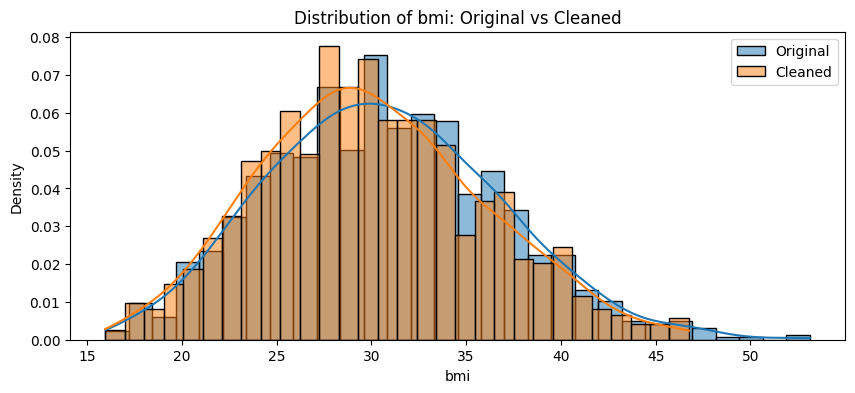

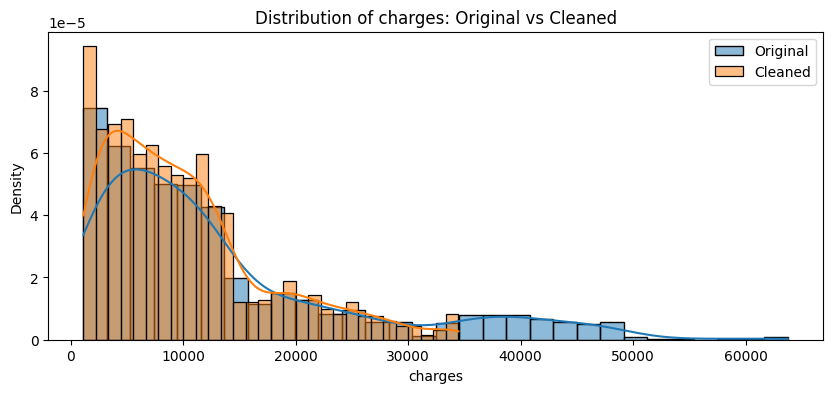

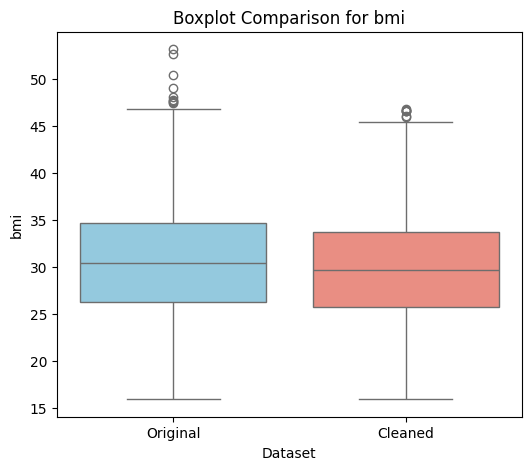

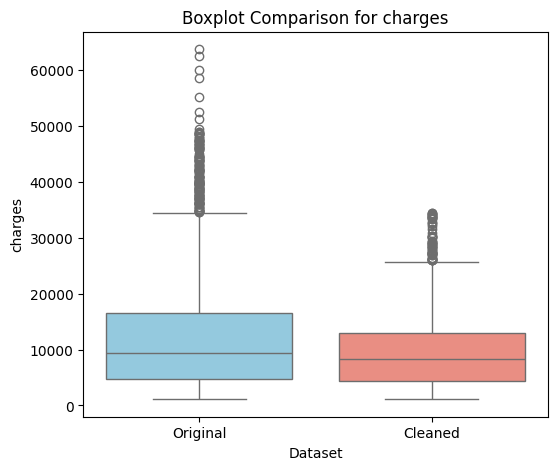

In [ ]:
# Visualizations: distributions and boxplots

# Histogram plots for original and cleaned data
for col in ['bmi', 'charges']:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, stat='density', bins=30, label='Original', alpha=0.5)
    sns.histplot(cleaned_df[col], kde=True, stat='density', bins=30, label='Cleaned', alpha=0.5)
    plt.title(f'Distribution of {col}: Original vs Cleaned')
    plt.legend()
    plt.show()

# Boxplot comparisons for original and cleaned data
for col in ['bmi', 'charges']:
    combined = pd.DataFrame({
        col: pd.concat([df[col], cleaned_df[col]], ignore_index=True),
        'Dataset': ['Original'] * len(df) + ['Cleaned'] * len(cleaned_df)
    })
    plt.figure(figsize=(6, 5))
    ax = sns.boxplot(x='Dataset', y=col, data=combined, hue='Dataset', palette=['skyblue', 'salmon'], dodge=False)
    plt.legend([], [], frameon=False)
    plt.title(f'Boxplot Comparison for {col}')
    plt.show()


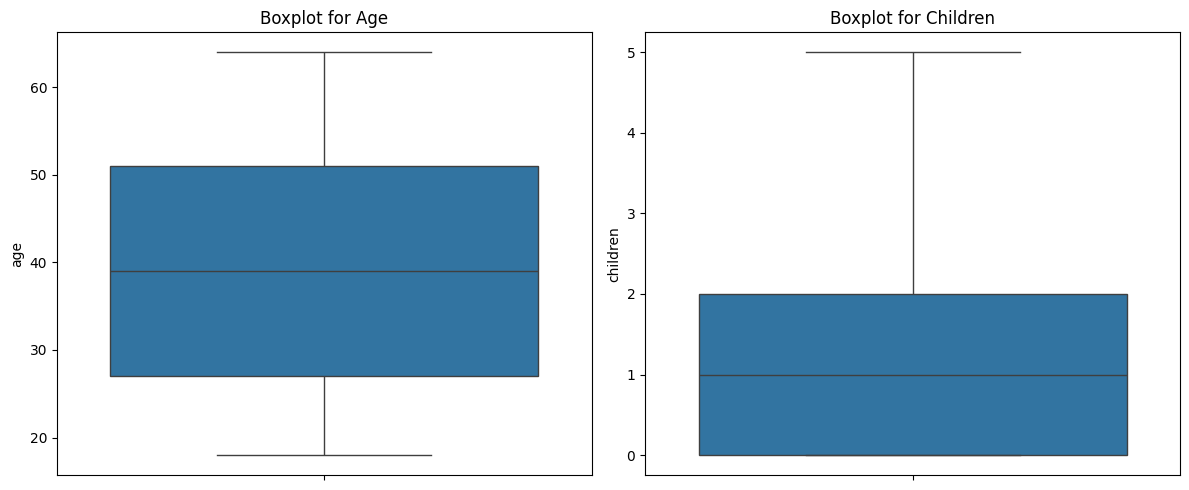

In [ ]:
# Boxplots for age and children
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['age'],      ax=axes[0]).set(title='Boxplot for Age')
sns.boxplot(y=df['children'], ax=axes[1]).set(title='Boxplot for Children')
plt.tight_layout()
plt.show()


Skewness before cleaning:
bmi        0.284047
charges    1.515880
dtype: float64

Skewness after cleaning:
bmi        0.262847
charges    1.175850
dtype: float64

Shapiro-Wilk p-value (Original charges): 1.15e-36
Shapiro-Wilk p-value (Cleaned charges):  7.81e-28


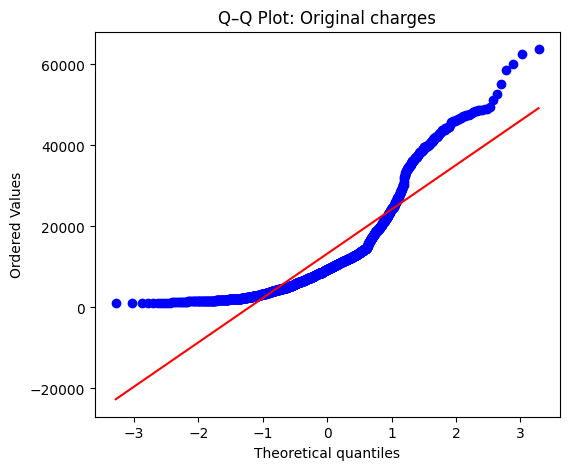

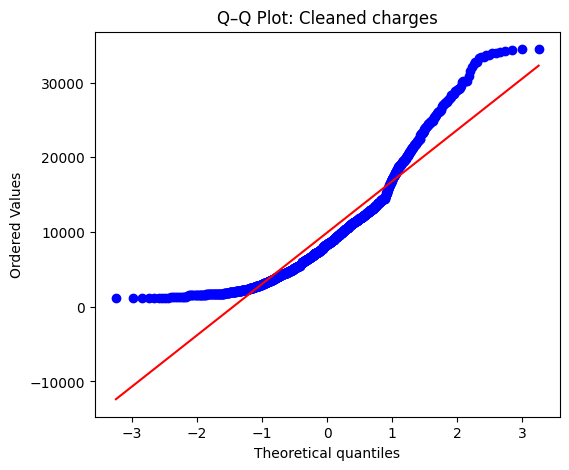

In [ ]:
# Skewness and normality checks
print("\nSkewness before cleaning:")
print(df[['bmi','charges']].skew())

print("\nSkewness after cleaning:")
print(cleaned_df[['bmi','charges']].skew())

stat_o, p_o = shapiro(df['charges'])
stat_c, p_c = shapiro(cleaned_df['charges'])
print(f"\nShapiro-Wilk p-value (Original charges): {p_o:.2e}")
print(f"Shapiro-Wilk p-value (Cleaned charges):  {p_c:.2e}")

# Q–Q plots
plt.figure(figsize=(6, 5))
stats.probplot(df['charges'],   dist="norm", plot=plt)
plt.title("Q–Q Plot: Original charges")
plt.show()

plt.figure(figsize=(6, 5))
stats.probplot(cleaned_df['charges'], dist="norm", plot=plt)
plt.title("Q–Q Plot: Cleaned charges")
plt.show()

## Conclusions on Handling Missing Values and Outliers

### Missing Values
In the dataset, 1,338 records and 7 columns (`age`, `sex`, `bmi`, `children`, `smoker`, `region`, `charges`) were found to contain no missing values. Imputation or record removal was therefore unnecessary.

---

### Outlier Detection (IQR Method)
The Interquartile Range (IQR) method was applied to all numeric columns to compute lower and upper bounds and identify extreme values:
- **`age` & `children`:** 0 outliers detected (confirmed by boxplots).  
- **`bmi`:** 9 outliers (BMI > 45), indicating either genuine severe obesity cases or measurement errors.  
- **`charges`:** 139 outliers, corresponding to very high medical costs (e.g., costly surgeries, intensive treatments) forming a long right-hand tail.

---

### Outlier Treatment Strategy
Anomalous observations in `bmi` and `charges` were removed (145 records, ~10.8% of data) to:
1. Eliminate noise that distorts central statistics (mean, standard deviation).  
2. Improve robustness of analytical and predictive models sensitive to extreme values.

---

### Causes and Impact of Outliers
- **High BMI values:** Reflect either severe obesity cases or data entry/measurement errors, which can skew average BMI and its correlations.  
- **Extreme `charges`:** Represent isolated expensive treatments; without removal, these outliers inflate the mean (≈13 270 → ≈9 942), increase variance (σ ≈12 110 → ≈7 251), and create a pronounced right skew (skewness ≈1.52 → ≈1.18).

---

### Cleaning Outcomes
- **Histograms:** Distributions of `bmi` and `charges` became more concentrated around central values after cleaning.  
- **Boxplots:** Whiskers and extreme points were significantly shortened, especially for `charges`.  
- **Central Tendency:** Mean and median for `charges` moved closer together, indicating reduced influence of extreme values.

---

### Normality Check
- **Shapiro–Wilk test:** p-values remained ≪ 0.05 both before and after cleaning, confirming the `charges` distribution is still non-normal.  
- **Q–Q plots:** Persistent right-tail deviations were observed, although slightly mitigated by outlier removal.

---

### Recommendations for Further Analysis
- **Modeling approaches** robust to non-normality and outliers (e.g., tree-based algorithms) are advised.  
- **Data transformations** (e.g., logarithmic, Box-Cox) of the `charges` variable may help approximate normality.  
- **Separate examination** of extreme cases could provide valuable insights into high-cost medical events.

> **Summary:**  
> Complete data without missing values allowed a focused outlier analysis. IQR-based removal of extreme `bmi` and `charges` values improved data homogeneity and central statistics. However, the `charges` distribution remains right-skewed and non-normal, warranting the use of robust modeling techniques or appropriate transformations.  

First five rows:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      2597

None


Descriptive statistics:


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


Using the following survey items for factor analysis: ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

Shape after removing missing values: (25893, 20)

Bartlett's test p-value: 0.0
KMO Model: 0.732912480795833


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


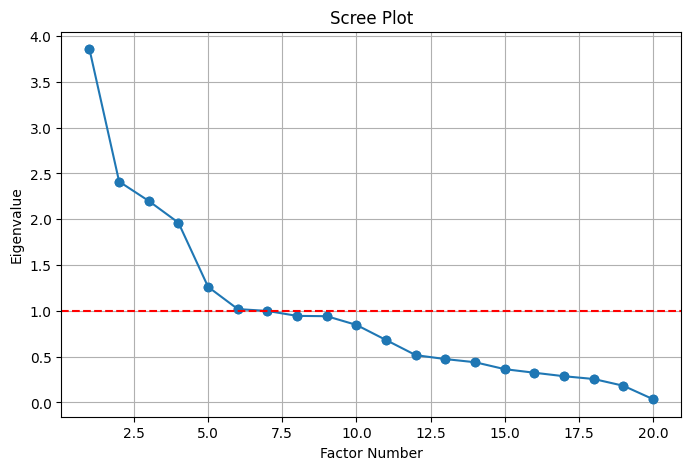


Number of factors to extract (Kaiser criterion): 6

Factor Loadings:


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,0,1,2,3,4,5
Unnamed: 0,-0.011371,-0.002701,-0.004175,-0.001855,-0.002700,0.003517
id,-0.024009,0.076939,-0.015539,-0.043386,0.016780,0.157644
Age,0.040701,-0.046745,-0.001429,0.033889,-0.001898,0.274349
Flight Distance,0.066409,0.094684,0.008720,0.045756,-0.019788,0.279309
Inflight wifi service,0.130349,0.126242,-0.007870,0.743534,0.367092,-0.011730
Departure/Arrival time convenient,-0.020969,0.052507,0.000460,0.118297,0.677493,0.068879
Ease of Online booking,-0.003520,0.033625,0.002401,0.694477,0.532734,0.037225
Gate location,0.024071,-0.031852,0.006003,0.150762,0.663854,-0.069775
Food and drink,0.777408,-0.018621,-0.038534,0.045967,-0.023658,0.044648
Online boarding,0.221584,0.047277,-0.013181,0.593147,-0.049218,0.601682


Communalities:


,Communality
Unnamed: 0,0.000177
id,0.033753
Age,0.080263
Flight Distance,0.093950
Inflight wifi service,0.720727
Departure/Arrival time convenient,0.480932
Ease of Online booking,0.768638
Gate location,0.469929
Food and drink,0.610861
Online boarding,0.767776



Interpretation of Factors:
Factor 1: ['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']
Factor 2: ['Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Inflight service']
Factor 3: ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
Factor 4: ['Inflight wifi service', 'Ease of Online booking', 'Online boarding']
Factor 5: ['Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']
Factor 6: ['Online boarding', 'Seat comfort']

Summary of Factor Analysis Findings:
- The Kaiser criterion suggested extracting 6 factors.
- The scree plot shows a leveling off after these factors.
- Factor loadings indicate that the survey items cluster into distinct factors.
- These underlying factors can be used for further research, such as modeling passenger satisfaction, identifying key service drivers, or optimizing operational strategies.


In [ ]:
# Task 3: Exploratory Factor Analysis on Airline Passenger Satisfaction Survey
# Objective: Uncover underlying factors that explain the patterns observed in survey responses related to work pressures,
# and identify what factors lead to customer satisfaction for an airline.

# Data Preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data/test.csv")

# Inspect the data
print("First five rows:")
display(df.head())

print("\nDataset info:")
display(df.info())

print("\nDescriptive statistics:")
display(df.describe())

# Focus on the survey items. For example, assume the survey items are:
survey_items = ['Seat_comfort', 'Inflight_service', 'Food_quality', 'Cleanliness', 'Entertainment', 'Value_for_money']
existing_items = [col for col in survey_items if col in df.columns]

# Fallback: if none of the specified survey items exist, use all numeric columns except a general rating like "Satisfaction"
if len(existing_items) < 2:
    existing_items = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    if "Satisfaction" in existing_items:
        existing_items.remove("Satisfaction")

print("Using the following survey items for factor analysis:", existing_items)

# Check for missing values and drop rows with missing values in the survey items
df_factor = df[existing_items].dropna()
print("\nShape after removing missing values:", df_factor.shape)

# 2) Factor Analysis

from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo

# Check that there are at least 2 variables to perform factor analysis
if df_factor.shape[1] < 2:
    raise ValueError("Not enough variables for factor analysis; at least 2 numeric variables are required.")

# Check the suitability of data for factor analysis using Bartlett's test and the KMO measure
chi_square_value, p_value = calculate_bartlett_sphericity(df_factor)
print("\nBartlett's test p-value:", p_value)

kmo_all, kmo_model = calculate_kmo(df_factor)
print("KMO Model:", kmo_model)

# Determine eigenvalues (no rotation)
fa_no_rotation = FactorAnalyzer(rotation=None)
fa_no_rotation.fit(df_factor)
ev, v = fa_no_rotation.get_eigenvalues()

# Plotting the scree plot to visualize eigenvalues
plt.figure(figsize=(8, 5))
plt.scatter(range(1, df_factor.shape[1] + 1), ev)
plt.plot(range(1, df_factor.shape[1] + 1), ev, 'o-')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='red', linestyle='--')  # Kaiser criterion cutoff
plt.grid()
plt.show()

# Determine number of factors using the Kaiser criterion (eigenvalue > 1)
num_factors = sum(ev > 1)
print("\nNumber of factors to extract (Kaiser criterion):", num_factors)

# Perform Exploratory Factor Analysis (EFA) using varimax rotation
fa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')
fa.fit(df_factor)
loadings = fa.loadings_
factor_loadings = pd.DataFrame(loadings, index=df_factor.columns)
print("\nFactor Loadings:")
display(factor_loadings)

# Calculate communalities
communalities = fa.get_communalities()
communalities_df = pd.DataFrame(communalities, index=df_factor.columns, columns=['Communality'])
print("Communalities:")
display(communalities_df)

# Interpret factors: list items with absolute loadings above 0.4 for each factor
print("\nInterpretation of Factors:")
for i in range(num_factors):
    items = factor_loadings.index[factor_loadings.iloc[:, i].abs() > 0.4].tolist()
    print(f"Factor {i+1}: {items}")
    # You can manually assign meaningful names based on these items

# 3) Reporting

print("\nSummary of Factor Analysis Findings:")
print(f"- The Kaiser criterion suggested extracting {num_factors} factors.")
print("- The scree plot shows a leveling off after these factors.")
print("- Factor loadings indicate that the survey items cluster into distinct factors.")
print("- These underlying factors can be used for further research, such as modeling passenger satisfaction, identifying key service drivers, or optimizing operational strategies.")


In [ ]:
import pingouin as pg

for i in range(num_factors):
    items = factor_loadings.index[factor_loadings.iloc[:, i].abs() > 0.4].tolist()
    if len(items) > 1:
        alpha, _ = pg.cronbach_alpha(df_factor[items])
        print(f"Cronbach’s alpha for Factor {i+1} ({items}): {alpha:.3f}")

Cronbach’s alpha for Factor 1 (['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']): 0.879
Cronbach’s alpha for Factor 2 (['Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Inflight service']): 0.789
Cronbach’s alpha for Factor 3 (['Departure Delay in Minutes', 'Arrival Delay in Minutes']): 0.982
Cronbach’s alpha for Factor 4 (['Inflight wifi service', 'Ease of Online booking', 'Online boarding']): 0.769
Cronbach’s alpha for Factor 5 (['Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']): 0.711
Cronbach’s alpha for Factor 6 (['Online boarding', 'Seat comfort']): 0.587


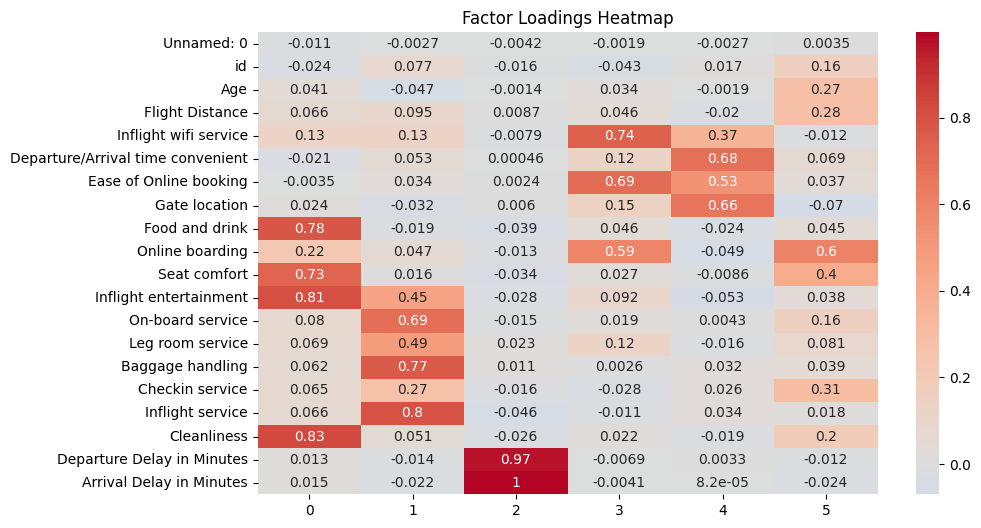

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Factor Loadings Heatmap")
plt.show()

In [9]:
for i in range(num_factors):
    items = factor_loadings.index[factor_loadings.iloc[:, i].abs() > 0.4].tolist()
    name = ", ".join(items)
    print(f"Suggested name for Factor {i+1}: based on -> {name}")

Suggested name for Factor 1: based on -> Food and drink, Seat comfort, Inflight entertainment, Cleanliness
Suggested name for Factor 2: based on -> Inflight entertainment, On-board service, Leg room service, Baggage handling, Inflight service
Suggested name for Factor 3: based on -> Departure Delay in Minutes, Arrival Delay in Minutes
Suggested name for Factor 4: based on -> Inflight wifi service, Ease of Online booking, Online boarding
Suggested name for Factor 5: based on -> Departure/Arrival time convenient, Ease of Online booking, Gate location
Suggested name for Factor 6: based on -> Online boarding, Seat comfort
